# Financial Planning with APIs and Simulations
Import the required libraries and dependencies.

In [235]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

Loading the environment variables from the .env file by calling the load_dotenv function.

In [236]:
load_dotenv()

True

## Creating a Financial Planner for Emergencies

### Evaluating the Cryptocurrency Wallet by Using the Requests Library

Here, we determine the current value of a member’s cryptocurrency wallet. Current prices for the Bitcoin and Ethereum cryptocurrencies are collected by using the Python Requests library. For the prototype, the program will assume that the member holds 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH).

In [237]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Creating a variable named `monthly_income`, and set its value to `12000`.

In [238]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Reviewing the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [239]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Using the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using API endpoints.

In [240]:
# Making an API call to access the current price of BTC.
btc_response = requests.get(btc_url).json()

# Displaying response data.
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18772756,
            "id": 1,
            "last_updated": 1627782587,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 783283665131,
                    "percent_change_1h": 0.0204133777081683,
                    "percent_change_24h": -0.532199072784095,
                    "percent_change_7d": 22.0351592203581,
                    "percentage_change_1h": 0.0204133777081683,
                    "percentage_change_24h": -0.532199072784095,
                    "percentage_change_7d": 22.0351592203581,
                    "price": 41753.0,
                    "volume_24h": 26920683429
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18772756,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [241]:
# Making an API call to access the current price of BTC.
eth_response = requests.get(eth_url).json()

# Displaying response data.
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 116921673,
            "id": 1027,
            "last_updated": 1627782545,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 299665913879,
                    "percent_change_1h": 0.364562453885706,
                    "percent_change_24h": 4.28713774909927,
                    "percent_change_7d": 17.4062834706052,
                    "percentage_change_1h": 0.364562453885706,
                    "percentage_change_24h": 4.28713774909927,
                    "percentage_change_7d": 17.4062834706052,
                    "price": 2563.72,
                    "volume_24h": 21707646962
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116921673,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Navigating the JSON response object to access the current price of each coin, and storing each in a variable.

In [242]:
# Accessing the current price of BTC.
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Printing the current price of BTC.
print(f"The price of Bitcoin is ${btc_price}")

The price of Bitcoin is $41753.0


In [243]:
# Accessing the current price of ETH.
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Printing the current price of ETH.
print(f"The price of Ethereum is ${eth_price}")

The price of Ethereum is $2563.72


### Calculating the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [244]:
# Computing the current value of the BTC holding.
btc_value = btc_coins * btc_price

# Printing the current value of the holding in BTC.
print(f"The value of Bitcoin in the cryptocurrency wallet is ${btc_value}")

The value of Bitcoin in the cryptocurrency wallet is $50103.6


In [245]:
# Computing the current value of the ETH holding. 
eth_value = eth_coins * eth_price

# Printing the current value of the holding in ETH.
print(f"The value of Ethereum in the cryptocurrency wallet is ${eth_value}")

The value of Ethereum in the cryptocurrency wallet is $13587.715999999999


In [246]:
# Computing the total value of the cryptocurrency wallet:
# Adding the value of the BTC holding to the value of the ETH holding.
total_crypto_wallet = btc_value + eth_value

# Printing the current cryptocurrency wallet total balance.
print(f"The total value of the cryptocurrency wallet is ${total_crypto_wallet}")

The total value of the cryptocurrency wallet is $63691.316


### Evaluating the Stock and Bond Holdings by Using the Alpaca SDK

Here, the program determines the current value of a member’s stock and bond holdings. First, an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). The prototype assumes that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion.

#### Reviewing the total number of shares held in both (SPY) and (AGG).

In [247]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### In the folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Setting the variables for the Alpaca API and secret keys. 
Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. 
Including the parameters for the Alpaca API key, the secret key, and the version number.

In [248]:
# Setting the variables for the Alpaca API and secret keys.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Checking that the values were imported correctly by evaluating the type.
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Creating the Alpaca tradeapi.REST object.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

str

str

#### Setting the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [249]:
# Setting the tickers for both the bond and stock portion of the portfolio.
tickers = ["SPY", "AGG"]

# Setting timeframe to 1D. 
timeframe = "1D"

# Formatting current date as ISO format.
# Setting both the start and end date at the date of prior weekday. 
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#### Getting the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. 
#### Formatting the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [250]:
# Using the Alpaca get_barset function to get current closing prices the portfolio.
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Reviewing the Alpaca DataFrame.
prices_df.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Navigating the Alpaca response DataFrame, selecting the `SPY` and `AGG` closing prices, and storing them as variables.

In [251]:
# Accessing the closing price for AGG from the Alpaca DataFrame.
# Converting the value to a floating point number.
agg_close_price = float(prices_df["AGG"]["close"])


# Printing the AGG closing price.
print(agg_close_price)

119.445


In [252]:
# Accessing the closing price for SPY from the Alpaca DataFrame.
# Converting the value to a floating point number. 
spy_close_price = float(prices_df["SPY"]["close"])


# Printing the SPY closing price.
print(spy_close_price)

334.55


#### Calculating the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and printing results.

In [253]:
# Calculating the current value of the bond portion of the portfolio.
agg_value = agg_shares * agg_close_price

# Printing the current value of the bond portfolio.
print(agg_value)

23889.0


In [254]:
# Calculating the current value of the stock portion of the portfolio.
spy_value = spy_shares * spy_close_price

# Printing the current value of the stock portfolio.
print(spy_value)

36800.5


In [255]:
# Calculating the total value of the stock and bond portion of the portfolio.
total_stocks_bonds = agg_value + spy_value

# Printing the current balance of the stock and bond portion of the portfolio.
print(total_stocks_bonds)

60689.5


In [256]:
# Calculating the total value of the member's entire savings portfolio.
# Adding the value of the cryptocurrency walled to the value of the total stocks and bonds.
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Printing current cryptocurrency wallet balance.
print(total_portfolio)

124380.81599999999


### Evaluating the Emergency Fund

Using the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the user has enough savings to build an emergency fund into their financial plan.

#### Creating a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [257]:
# Consolidating financial assets data into a Python list.
savings_data = [total_crypto_wallet,total_stocks_bonds]

# Reviewing the Python list savings_data.
savings_data

[63691.316, 60689.5]

#### Using the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then displaying this DataFrame.

In [258]:
# Creating a Pandas DataFrame called savings_df. 
savings_df = pd.DataFrame(savings_data, index=["Crypto", "Stocks + Bonds"], columns=['Amount'])

# Displaying the savings_df DataFrame.
savings_df.head()

,Amount
Crypto,63691.316
Stocks + Bonds,60689.500


#### Using the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio.

<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Amount'>

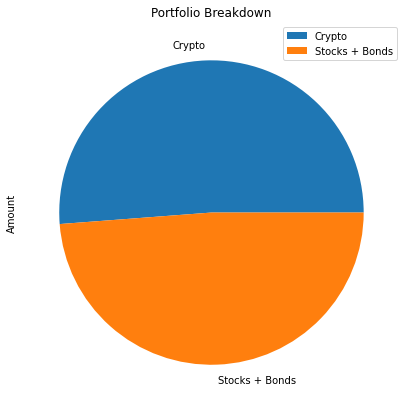

In [259]:
# Plotting the total value of the member's portfolio (crypto and stock/bond) in a pie chart.
savings_df.plot.pie(figsize=(10,7), y='Amount', title='Portfolio Breakdown')

#### Determining if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

##### Creating a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000.

In [260]:
# Creating a variable named emergency_fund_value.
emergency_fund_value = (monthly_income * 3)

##### Creating a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

In [261]:
# Evaluating the possibility of creating an emergency fund with 3 conditions:
if (total_portfolio > emergency_fund_value):
    print("Congratulations! You have more than enough money in your fund!")
elif (total_portfolio == emergency_fund_value):
    print("Congratulations! You have reached an important financial goal!")
elif (total_portfolio < emergency_fund_value):
    print(f"You are ${emergency_fund_value == total_portfolio: ,.2f} away from reaching the goal!")

Congratulations! You have more than enough money in your fund!


## Creating a Financial Planner for Retirement

### Creating the Monte Carlo Simulation

Using the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio.

#### Making an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [262]:
# Setting start and end dates of 3 years back from your current date.
start_date = pd.Timestamp("2018-07-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-07-30", tz="America/New_York").isoformat()

# Setting number of rows to 1000 to retrieve the maximum amount of rows.
limit_rows = 1000

In [264]:
# Using the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data.
portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Displaying both the first and last five rows of the DataFrame.
display(portfolio_df.head())
display(portfolio_df.tail())

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-07-30 00:00:00-04:00  105.94  106.0500  105.910  105.95  2784448.0   
2018-07-31 00:00:00-04:00  106.11  106.1756  106.050  106.06  4704161.0   
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2018-07-30 00:00:00-04:00  281.49  281.69  279.3600  279.89  46935673  
2018-07-31 00:00:00-04:00  280.81  282.02  280.3800  281.22  48645613  
2018-08-01 00:00:00-04:00  281.56  282.13  280.1315  280.92  40627557  
2018-08-02 00:00:00-04:00  279.38  282.58  279.1600  282.34  42491022  
2018-08-03 00:00:00-04:00  282.53  283.65  282.3300  283.64  34485363

AGG                                        \
                             open     high       low   close     volume   
time                                                                      
2021-07-26 00:00:00-04:00  116.30  116.330  116.0850  116.11  7028009.0   
2021-07-27 00:00:00-04:00  116.35  116.400  116.2727  116.39  4669859.0   
2021-07-28 00:00:00-04:00  116.24  116.490  116.1400  116.48  5189696.0   
2021-07-29 00:00:00-04:00  116.29  116.360  116.2250  116.28  5216456.0   
2021-07-30 00:00:00-04:00  116.36  116.485  116.3532  116.45  4859650.0   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2021-07-26 00:00:00-04:00  439.31  441.03  439.26  440.99  40155852  
2021-07-27 00:00:00-04:00  439.91  439.94  435.99  439.00  61032234  
2021-07-28 00:00:00-04:00  439.68  440.30  437.31  438.84  47642330  
2021-07-29 00:00:00-04:00  439.83  441.80  439.81  440.67  40930880  
2021-07-30 00:00:00-04:00  437.91  440.06  437.77  438.49  56594282

#### Running a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and plotting the results.

In [265]:
# Configuring the Monte Carlo simulation to forecast 30 years cumulative returns.
# The weights are split 40% to AGG and 60% to SPY.
# Running 500 samples.
MC_stocks_bonds_30y = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Reviewing the simulation input data.
MC_stocks_bonds_30y.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-07-30 00:00:00-04:00  105.94  106.0500  105.910  105.95  2784448.0   
2018-07-31 00:00:00-04:00  106.11  106.1756  106.050  106.06  4704161.0   
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-07-30 00:00:00-04:00          NaN  281.49  281.69  279.3600  279.89   
2018-07-31 00:00:00-04:00     0.001038  280.81  282.02  280.3800  281.22   
2018-08-01 00:00:00-04:00    -0.003489  281.56  282.13  280.1315  280.92   
2018-08-02 00:00:00-04:00     0.000378  279.38  282.58  279.1600  282.34   
2018-08-03 00:00:00-04:00     0.001892  282.53  283.65  282.3300  283.64   

                                                  
                             volume daily_return  
time                                              
2018-07-30 00:00:00-04:00  46935673          NaN  
2018-07-31 00:00:00-04:00  48645613     0.004752  
2018-08-01 00:00:00-04:00  40627557    -0.001067  
2018-08-02 00:00:00-04:00  42491022     0.005055  
2018-08-03 00:00:00-04:00  34485363     0.004604

In [266]:
# Running the Monte Carlo simulation to forecast 30 years cumulative returns.
MC_stocks_bonds_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004821,0.991649,0.993875,1.007211,0.997647,0.996829,0.998751,1.000934,1.000316,1.009084,...,1.010914,0.992251,1.007529,1.008217,1.012229,1.014513,1.009259,0.994178,0.995633,0.989360
2,1.016417,1.004220,0.985747,1.021382,0.988679,1.015418,1.005636,0.999107,1.012704,1.007358,...,1.032922,0.995712,1.000423,1.007171,1.010210,1.005881,1.010040,1.012593,1.005999,0.988355
3,1.019303,1.009748,0.976433,1.018312,0.988433,1.013569,1.005734,1.007912,1.011014,1.009115,...,1.021927,1.012973,1.011102,1.009143,1.017960,1.008700,1.011760,1.007867,1.011374,0.992591
4,1.014174,1.002444,0.980948,1.026799,0.983086,1.001237,0.998947,1.013754,1.014919,1.020193,...,1.021974,1.014081,0.998245,1.008218,1.011819,1.004985,0.996526,1.006295,1.017236,0.980647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,88.371910,11.779086,43.006267,11.449719,22.728005,51.031051,16.931107,18.849323,29.021286,33.512685,...,21.068422,34.663819,31.428583,39.156228,99.196423,20.704535,37.748780,28.040081,28.186693,36.533049
7557,88.281184,11.732107,43.385977,11.475538,22.792622,51.130093,16.929740,18.980155,29.701294,33.785875,...,21.318385,34.208460,31.596307,39.412123,101.140600,20.751958,37.362228,27.969268,27.653226,36.566613
7558,89.683602,11.910231,43.510895,11.395323,23.073235,51.022962,17.125437,19.363951,29.777837,33.879838,...,21.551372,34.134687,32.063903,39.599076,100.575674,20.755332,37.579700,27.850823,27.626684,36.063276
7559,89.343885,11.874429,43.237103,11.564130,22.974711,51.258663,17.345985,19.244915,29.631740,33.885684,...,21.522100,33.989298,32.390378,40.024804,100.382052,20.709276,37.274808,28.088064,27.796509,36.141896


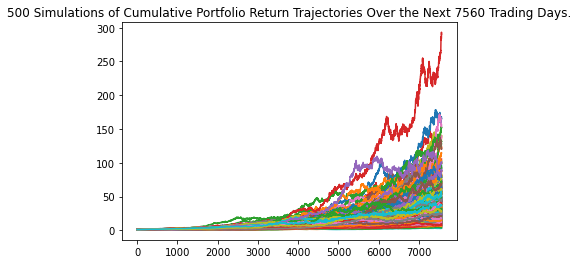

In [267]:
# Visualizing the 30-year Monte Carlo simulation by creating an
# overlay line plot.
stocks_bonds_line_plot_30y = MC_stocks_bonds_30y.plot_simulation()

#### Plotting the probability distribution of the Monte Carlo simulation.

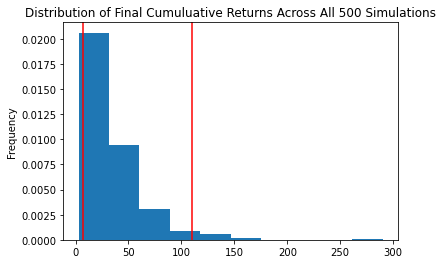

In [268]:
# Visualizing the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram.
stocks_bonds_distribution_plot_30y = MC_stocks_bonds_30y.plot_distribution()

#### Generating the summary statistics for the Monte Carlo simulation.

In [269]:
# Generating summary statistics from the 30-year Monte Carlo simulation results.
# Saving the results as a variable.
stocks_bonds_stats_30y = MC_stocks_bonds_30y.summarize_cumulative_return()

# Reviewing the 30-year Monte Carlo summary statistics.
print(stocks_bonds_stats_30y)

count           500.000000
mean             34.846022
std              28.708334
min               2.863580
25%              16.419277
50%              26.642812
75%              43.917154
max             290.266396
95% CI Lower      7.030195
95% CI Upper    110.241970
Name: 7560, dtype: float64


### Analyzing the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics generated from the Monte Carlo simulation, to evaluate what are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval.


In [270]:
# Printing the current balance of the stock and bond portion of the members portfolio.
current_balance = total_stocks_bonds
print(current_balance)

60689.5


In [271]:
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio.
ci_lower_cumulative_return_30y = round(stocks_bonds_stats_30y[8] * current_balance)
ci_upper_cumulative_return_30y = round(stocks_bonds_stats_30y[9] * current_balance)

# Printing the result of your calculations.
print(f"The expected 30 year value of the portfolio with a 95% confidence interval"
      f" will end within the range of"
      f" ${ci_lower_cumulative_return_30y} and ${ci_upper_cumulative_return_30y}.")

The expected 30 year value of the portfolio with a 95% confidence interval will end within the range of $426659 and $6690530.


### Forecasting Cumulative Returns in 10 Years

Adjusting the retirement portfolio to run a new Monte Carlo simulation to find out if the changes will allow user to retire earlier.

In [272]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns.
# The weights are split 20% to AGG and 80% to SPY.
# Running 500 samples.
MC_stocks_bonds_10y = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Reviewing the simulation input data
MC_stocks_bonds_10y.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2018-07-30 00:00:00-04:00  105.94  106.0500  105.910  105.95  2784448.0   
2018-07-31 00:00:00-04:00  106.11  106.1756  106.050  106.06  4704161.0   
2018-08-01 00:00:00-04:00  105.55  105.7600  105.512  105.69  3896190.0   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.73  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.93  2286629.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2018-07-30 00:00:00-04:00          NaN  281.49  281.69  279.3600  279.89   
2018-07-31 00:00:00-04:00     0.001038  280.81  282.02  280.3800  281.22   
2018-08-01 00:00:00-04:00    -0.003489  281.56  282.13  280.1315  280.92   
2018-08-02 00:00:00-04:00     0.000378  279.38  282.58  279.1600  282.34   
2018-08-03 00:00:00-04:00     0.001892  282.53  283.65  282.3300  283.64   

                                                  
                             volume daily_return  
time                                              
2018-07-30 00:00:00-04:00  46935673          NaN  
2018-07-31 00:00:00-04:00  48645613     0.004752  
2018-08-01 00:00:00-04:00  40627557    -0.001067  
2018-08-02 00:00:00-04:00  42491022     0.005055  
2018-08-03 00:00:00-04:00  34485363     0.004604

In [273]:
# Running the Monte Carlo simulation to forecast 10 years cumulative returns.
MC_stocks_bonds_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006534,1.002979,0.979227,0.999474,0.993396,1.009564,0.986568,0.993171,1.000595,0.999912,...,0.980553,1.000315,0.971297,0.995139,1.003373,0.997213,0.997635,0.998608,0.993279,1.017475
2,0.980414,1.017164,0.973006,1.003113,0.964564,1.008708,0.991426,0.995442,0.985157,0.994030,...,1.002110,1.008528,0.967358,1.012962,0.981449,0.994567,1.002056,0.999193,1.005776,1.030534
3,0.959093,1.037130,0.978458,1.024056,0.958260,1.011878,1.002917,0.995904,0.990977,0.993208,...,1.015679,1.023554,0.955459,1.015545,0.976226,0.983591,1.007767,0.969810,1.007238,1.022524
4,0.950431,1.042605,0.974922,1.013782,0.942267,1.015681,0.997994,0.987608,0.984403,0.974157,...,1.009337,1.019150,0.964045,1.021304,0.968975,0.973999,1.016279,0.980534,1.010030,1.012955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.855152,1.121578,3.884152,3.990926,4.422970,2.642032,5.430387,11.560500,1.930990,2.725705,...,4.529248,2.082226,3.262806,5.394992,1.775733,8.439916,2.038759,0.929545,5.559206,2.013240
2517,5.857223,1.116039,3.920353,4.026022,4.373059,2.673294,5.506481,11.622395,1.903885,2.719691,...,4.588420,2.064650,3.294676,5.498847,1.771465,8.451015,2.038498,0.942625,5.553403,2.039957
2518,5.889246,1.120748,3.925431,4.110990,4.369797,2.627264,5.406361,11.576663,1.964499,2.752188,...,4.586698,2.067756,3.248834,5.577475,1.754412,8.388285,2.049884,0.946310,5.588007,1.998728
2519,5.884589,1.126986,3.925368,4.067012,4.406355,2.615057,5.460400,11.449671,1.931659,2.746782,...,4.631200,2.087202,3.183210,5.537446,1.750137,8.400005,2.049825,0.958966,5.509864,1.981834


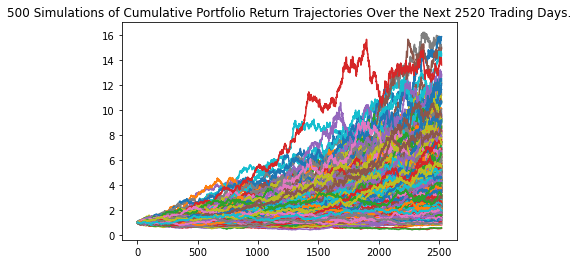

In [274]:
# Visualizing the 10-year Monte Carlo simulation by creating an
# overlay line plot.
stocks_bonds_line_plot_10y = MC_stocks_bonds_10y.plot_simulation()

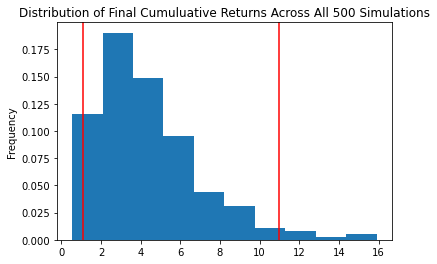

In [275]:
# Visualizing the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram.
stocks_bonds_distribution_plot_10y = MC_stocks_bonds_10y.plot_distribution()

In [276]:
# Generating summary statistics from the 10-year Monte Carlo simulation results.
# Saving the results as a variable.
stocks_bonds_stats_10y = MC_stocks_bonds_10y.summarize_cumulative_return()

# Reviewing the 10-year Monte Carlo summary statistics.
print(stocks_bonds_stats_10y)

count           500.000000
mean              4.348034
std               2.618589
min               0.547570
25%               2.424766
50%               3.791297
75%               5.512759
max              15.896840
95% CI Lower      1.095377
95% CI Upper     10.985994
Name: 2520, dtype: float64


### Summary:

#### Question 1: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [277]:
# Printing the current balance of the stock and bond portion of the members portfolio
print(current_balance)

60689.5


In [233]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return_10y = round(stocks_bonds_stats_10y[8] * current_balance)
ci_upper_cumulative_return_10y = round(stocks_bonds_stats_10y[9] * current_balance)

# Print the result of your calculations
print(f"The expected 10 year value of the portfolio with a 95% confidence interval"
      f" will end within the range of"
      f" ${ci_lower_cumulative_return_10y} and ${ci_upper_cumulative_return_10y}.")

The expected 10 year value of the portfolio with a 95% confidence interval will end within the range of $75181 and $630196.


#### Question: Will weighting the portfolio more heavily to stocks allow the user to retire after only 10 years?
**Answer:** No, weighting the portfolio more heavily to stocks will not allow the user to retire after only 10 years. The expected 30 year value of the portfolio with a 95% confidence interval will end within the range of 426,659 and 6,690,530 while the expected 10 year value of the portfolio with a 95% confidence interval will end within the range of 75,181 and 630,196. Not only will the upper cumulative return of the 10 year heavily stock weighted portfolio not suffice for a suitable retirement fund, but also the end range is very underwhelming at only a 23.8781% increase from the current balance of 60,689.50.